### Your name:

<pre> Ksenia Khlopotina </pre>


In [27]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Classification - Based on Week 3

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In week 3, you:
- Explored the dataset
- Built a full data pipeline
- Pre-processed data, explored features

Building on your work of week 3:
- Split dataset into 3 sets:
  - 70% -> Training and cross validation
  - 15% -> Model Stacking
  - 15% -> Testing
  

  

In [28]:
df = pd.read_excel

("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", 
                   sheet = 0, skiprows= 1, header = 0)

In [29]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
###To remind ourselves of the dataLIMIT_BAL: Amount of given credit (in NT dollars) for the invidiual consumer credit and his/her family credit

GENDER:
1 = Male
2 = Female
EDUCATION:
1 = Graduate school
2 = University
3 = High School
4 = Others
MARITAL STATUS:

1 = Married
2 = Single
3 = Others
AGE: In years
PAY_#: History of past monthly payment records (April 2005 to September 2005). The scale is
-1 = Duly paid
1 = One month delay
2 = 2 month delay ...
N = N month delay
BILL_AMT#: Amount on bill statement (in NT dollars) from April 2005 to September 2005
PAY_AMT#: Amount of previous payment (in NT dollars) from April 20015 to September 2005
default payment next month: The data label
0 = Did not default
1 = Default
Note that PAY_0 seems to be an odd column header since the BILL_AMT and PAY_AMT columns go 
from 1 (April 2005) to 6 (September 2005).

SyntaxError: invalid syntax (<ipython-input-30-2b27fa1eac29>, line 3)

In [31]:
df = df.rename(columns = {'PAY_0':'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [59]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.15, random_state = 143)

In [33]:

#Exploring the data
credit = train_set.copy()
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000,...,25500.000000,25500.000000,25500.000000,25500.000000,2.550000e+04,25500.000000,25500.000000,25500.000000,25500.000000,25500.000000
mean,15033.639882,167285.869804,1.603529,1.853843,1.552157,35.485255,-0.016549,-0.132275,-0.162118,-0.216353,...,43567.317176,40585.958745,39112.578471,5682.263725,5.919331e+03,5278.801333,4843.429686,4730.624784,5268.140863,0.220314
std,8659.205289,129635.182595,0.489174,0.789462,0.521908,9.212439,1.119073,1.192990,1.196059,1.170533,...,64722.817890,61117.921281,60027.638642,16888.098444,2.158282e+04,17967.289605,15654.622433,14825.316683,17929.374918,0.414466
min,2.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7555.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,1831.000000,1280.000000,1000.000000,8.800000e+02,396.000000,300.000000,272.000000,150.000000,0.000000
50%,15048.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19115.500000,18178.000000,17169.000000,2115.000000,2.012500e+03,1822.500000,1500.000000,1504.000000,1500.000000,0.000000
75%,22557.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54821.500000,50491.000000,49370.000000,5019.000000,5.000000e+03,4598.000000,4040.250000,4088.500000,4012.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


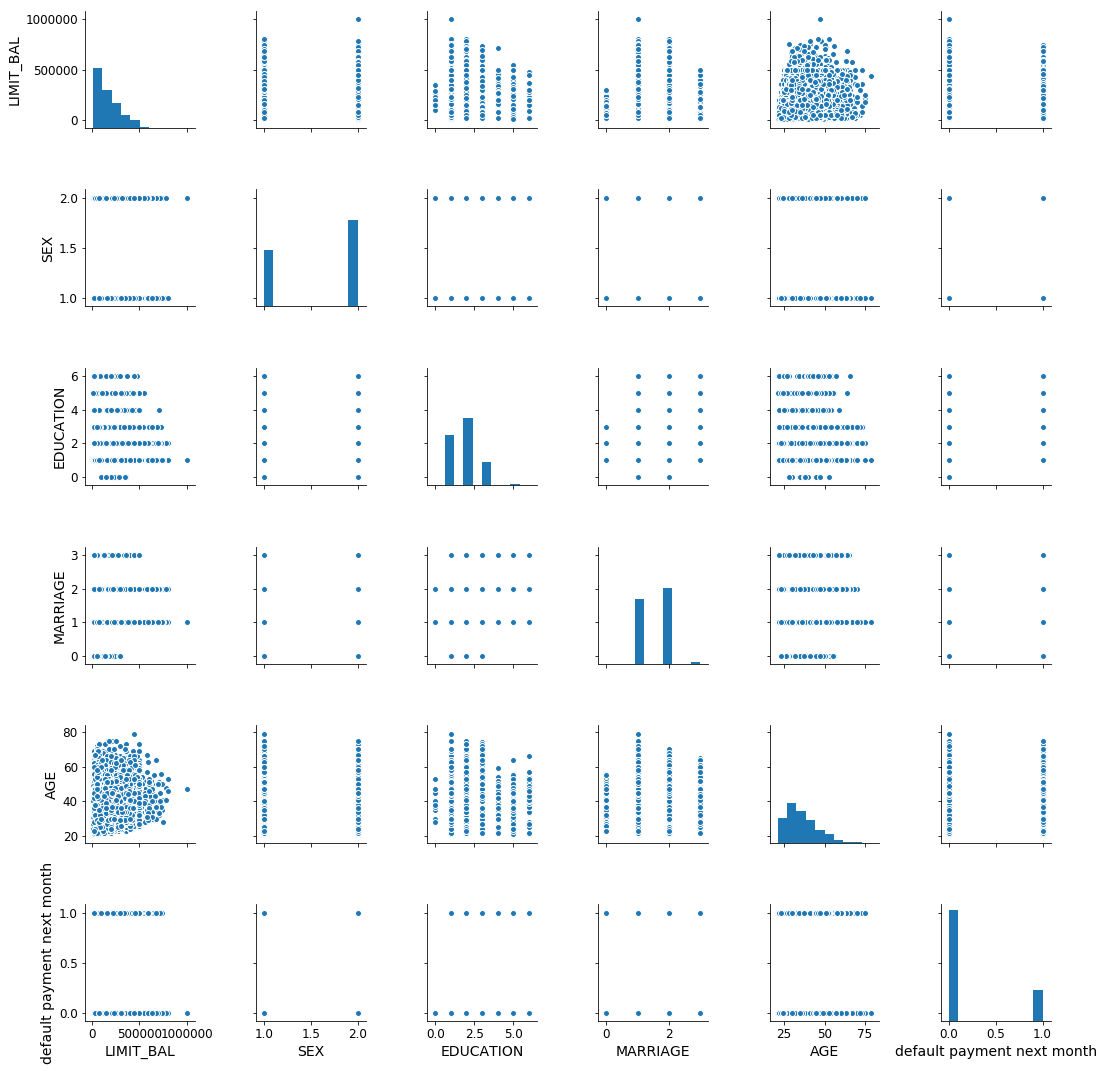

In [34]:
import seaborn as sns
credit_nobillpay = credit[["LIMIT_BAL", "SEX","EDUCATION","MARRIAGE","AGE", "default payment next month"]].copy()
sns.pairplot(credit_nobillpay)

In [35]:
#Preparing the data
credit = train_set.drop("default payment next month", axis = 1)

credit_labels = train_set["default payment next month"].copy()

In [36]:
#Building pipeline for categorical and numerical values

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

In [46]:
from sklearn.pipeline import FeatureUnion
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, credit, y=None):
        return self
    def transform(self, credit):
        return credit[self.attribute_names].values

In [47]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline


In [48]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["LIMIT_BAL", "AGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                                              "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
                                              "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"])),
        ])

In [49]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["SEX", "EDUCATION", "MARRIAGE"])),
        ("cat_encoder", OneHotEncoder),
    ])

In [54]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [51]:
#We can view transformations in the categorical data.
credit.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
7552,7553,120000,2,1,2,26,-1,-1,-1,-1,...,721,444,710,1920,485,721,444,710,1920,0
9807,9808,70000,1,1,2,31,0,0,-2,-2,...,0,0,0,0,0,0,0,0,0,0
3918,3919,180000,2,3,1,43,-1,-1,0,0,...,61424,61039,64260,64618,60267,3000,2154,5000,3000,3000
13548,13549,20000,1,2,2,36,0,0,0,0,...,18514,30382,0,0,5000,2000,1000,6000,0,0
1692,1693,150000,2,1,2,27,-2,-2,-2,-2,...,610,0,610,0,610,610,0,610,0,0
28425,28426,170000,2,2,2,30,0,0,0,2,...,136552,132655,134140,115892,6000,19078,0,5000,5000,4500
1705,1706,20000,1,3,2,32,0,0,2,2,...,5758,12619,12274,15049,2400,0,7000,0,3000,4000
5796,5797,140000,2,1,2,33,-2,-2,-2,-2,...,1264,0,0,1980,0,1264,0,0,1980,1351
862,863,30000,2,3,2,52,2,2,7,7,...,2450,2450,2450,2450,0,0,0,0,0,0
10632,10633,50000,1,1,2,26,-1,2,2,-1,...,-978,978,652,626,0,0,1956,0,626,0


In [52]:
credit["EDUCATION"].value_counts()

2    11914
1     8986
3     4206
5      233
4      106
6       42
0       13
Name: EDUCATION, dtype: int64

In [ ]:

- Tune a decision tree classfier:
  - select a score (http://scikit-learn.org/stable/modules/model_evaluation.html). Explain your choice 
  - tune one parameter a time. Generate a plot for the score vs parameter values. Analyze your results.
    - criterion, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes=None    
  - tune all parameters at the same time using a randomgrid(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). First, run with a coarse grid, then refine in the next iteration. Use the information from the previous step to select parameter values.

In [ ]:
#DecisionTreeClassifier
#First Run an algorithm on the model without tuning parameters

In [90]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.725294117647


In [91]:
#Building a Decision Tree using Gini function for a split for a criterion parameter.
#Also using max_depth of tree as 3, and minimal samples in a leaf as 5.

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 42,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred_tree = clf_gini.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.820294117647


In [ ]:
#Instant improvement.

In [92]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [99]:
#Now I will explore Information Gain criterion to

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
 max_depth=4, min_samples_leaf=5)

clf_entropy.fit(X_train, y_train)

y_pred_tree = clf_entropy.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.820588235294


In [ ]:
#Here, if I just changed the critereon to the log-function driven Entropy, i got the same result as with Gini.
#0.820294117647 for accuracy score.
#But i also experimented with 
#max_depth parameter, and changed it to 4 and improved the result.
#Setting it to 5 and 6 would actually only worsen  the accuracy to 0.81.

In [110]:
#Changing the min_samples_leaf parameter to lesser quanitity did not change the result,
#while changing it to a bigger quantity only reduced the performance.

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 42,
 max_depth=4, min_samples_leaf=10)

clf_entropy.fit(X_train, y_train)

y_pred_tree = clf_entropy.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.820294117647


In [ ]:
##Now, I will adjust all parameters at the same time through an automatic best-parameter fit
##in RandomizedSearchCV.

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [168]:
random_search_for_dec_tree_clf.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [173]:
# specify parameters and distributions to sample from
param_dist = {
            
              'criterion':["gini", "entropy"],
              'max_depth':[3, None],
              "max_features":  sp_randint(1, 4),
              'min_impurity_split':sp_randint(2, 11),
              'min_samples_leaf':sp_randint(1, 5),
              'min_samples_split':sp_randint(2, 11)
             }

In [174]:
# build a classifier
random_search_for_dec_tree_clf = DecisionTreeClassifier()

In [175]:
n_iter_search = 20
random_search = RandomizedSearchCV(random_search_for_dec_tree_clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

In [165]:
random_search.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a24c2d7f0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a24c2de48>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a24535048>, 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring=None, verbose

In [176]:
random_search.fit(X_train, y_train)

/Users/ksenia/Applications/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ksenia/Applications/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ksenia/Applications/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ksenia/Applications/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the

/Users/ksenia/Applications/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ksenia/Applications/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ksenia/Applications/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/ksenia/Applications/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params={}, iid=True, n_iter=20, n_jobs=1,
          param_distributions={'criterion': ['gini', 'entropy'], 'max_depth': [3, None], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a247460b8>, 'min_impurity_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a24c82ac8>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a247465c0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a24c72b00>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
         

In [190]:

print(random_search.grid_scores_)

[mean: 0.78085, std: 0.00006, params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_impurity_split': 6, 'min_samples_leaf': 2, 'min_samples_split': 8}, mean: 0.78085, std: 0.00006, params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 1, 'min_impurity_split': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}, mean: 0.78085, std: 0.00006, params: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_impurity_split': 3, 'min_samples_leaf': 1, 'min_samples_split': 6}, mean: 0.78085, std: 0.00006, params: {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_impurity_split': 8, 'min_samples_leaf': 3, 'min_samples_split': 5}, mean: 0.78085, std: 0.00006, params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_impurity_split': 3, 'min_samples_leaf': 1, 'min_samples_split': 4}, mean: 0.78085, std: 0.00006, params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_impurity_split': 9, 'min_samples_leaf': 3

In [184]:
print("Best parameters are" + str(random_search.best_params_))

Best parameters are{'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_impurity_split': 6, 'min_samples_leaf': 2, 'min_samples_split': 8}


In [185]:
print("Best score is" +  str(random_search.best_score_))

Best score is0.7808496732026143


In [61]:
### Ensemble Learning

Make sure to read and understand the documentation for each classifier.

Remember to make your code modular; it will save you rewriting the same things multiple times and will help avoid copy paste errors.

  
- Tune the following classifiers:
  - Random forest classfier
  - Adaboost Tree classifier
  - Extra trees classifier
  - Gradient Boosted Tree classifier
  - Logistic Regression
  
- Analyze, compare, and interpret your results
- What ensemble yields the best result? Can you identify certain types of events that are classified better/worse from the type of algorithm?
- Is the feature importance consistent for all classifiers?

In [88]:
#One approach to  Ensemble Learning is Combining different classifiers through Voting. 
#In Voting Classifiers remain independent of each other.

In [89]:
#Making classifiers and comparing different models' performances

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)
xtr_clf = ExtraTreesClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [189]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, xtr_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.777745098039
RandomForestClassifier 0.804117647059
SVC 0.777941176471
ExtraTreesClassifier 0.807941176471
VotingClassifier 0.778039215686


In [ ]:
#Another approach to ENsemble Learning is Bagging different classifiers 
#and giving heavier weight to estimators with stronger prediciting power.
#Compared to Voting, here we do not collect votes from different classifiers.
#We run withing the same type of classifier, but the number of estimators is sufficient enough.

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.819019607843


In [68]:

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.725294117647


In [ ]:
#Comparing the results of the DecisionTreeClassifier in an Ensemble,
#and on its own, in the second attempt, we can observe the improvement in accuracy scoring.

In [70]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

In [85]:
y_pred_tree = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.817647058824


In [86]:
#RandomForestClassifuer
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_tree = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.804117647059


In [87]:
#GradientBoosting
np.random.seed(42)
#X = np.random.rand(100, 1) - 0.5
#y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [75]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [78]:
y2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [79]:

y3 = y2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [82]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [83]:
y_pred

array([ 0.41776998,  0.41776998,  1.89574468, ...,  0.41776998,
        0.41776998,  0.41776998])

In [84]:
print(accuracy_score(y_test, y_pred_tree))

0.725294117647


#### Conclusions?

Explain your results and choices

In [ ]:
#RandowmForectCLassifier and AdaBoostClassifier scored highest in predictions

In [ ]:
#One approach to  Ensemble Learning is Combining different classifiers through Voting. 
#In Voting Classifiers remain independent of each other.
#They estimate the belonging to each class, then Voting is done
#during which the  votes among all the classifiers are collected
#to select the most popular estimation of belonging to a class, and the class-allocation that
#gets most votes - wins.
#This way even the weakest classifier gets diluted in the stronger classifiers in this ensemble 
#as the decision is made collectively and at least equal presence of strong classifiers
#allows for the more accurate prediction quality compared to
#if the weaker classifiers worked on their own.

In [ ]:
#On its own Logistic Regression and SVC classifier achieved only 0.77 scoring.
#When combined in a voting approach of an ensemble, and due to 
#a stronger predicting power of RandomForestClassifier (0.80), the total
#score turned out to be 0.78.

In [ ]:
#Having another approach of combining the predictive power of several estimators 
#is Bagging approach of Ensemble Learning.
#Here predicting is performed on different samples of a dataset to eliminate bias.
#As bagging (taking data points and predicting on them) happens at random
#the same data points may be grabbed for the same instance of bagging - this is what "with replacement" is.
#After the model is trained, we put it the same X (input) data to all models, then get an average mean
# of the output Y.

In [ ]:
#For example, AdaBoost algorithm yielded 0.81 result, after combining
#several DecisionTreeClassifiers when the accuracy of one DecisionTreeCLassier is0.725.

Q. (Optional) If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

I noticed that when I increase the max_depth parameter, it did improve the result when changed from 3 to 4.
However, setting it to 5 and 6 only worsened the outcome.

Overfitting happens when the number of data points in a leaf is too small.
By increasing the number of max_depth, but not too high, we can eliminate overfitting. It shall be cautioned against that increasing the number too high may cause underfitting, under which condition no conclusions will be learnt from the data samples.Max_depth is one of the parameters that can be modifier in case of overfitting because it controls
the size of the tree. The number of samples required to populate the tree doubles for each additional level the tree grows to. 

Q. (Optional) If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

It seems that just by increasing the number of features we don't eliminate the problem of information not being learnt from the data because the size of the data is too large. The greater number of features would create
even a greater complexity. Also, features have to be main and key in order to make an impact in decision making for the tree. If the number of features is large but the proportion of key features is small, then we only make it more difficult for the algorithm to select the needed features, plus the given large size of data. 

Q. (Optional) What is the difference between hard and soft voting classifiers?

In hard voting, we predict the final class label as the class label that has been predicted most frequently by the classification models. In soft voting, we predict the class labels by averaging the class-probabilities (only recommended if the classifiers are well-calibrated).

Q. (Optional) If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how?

Q. (Optional) If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

A lower learning rate should find a better optimum than a higher learning rate.So generally speaking, on a scale,
a smaller learning rate shall improve the performacne of GBT.
But we should tune the hyper-parameters using grid search to find the best combination of learning rate along with the other hyper-parameters.

### Submit your notebook

Submit your solution here
https://goo.gl/forms/VKD7Zwu54oHjutDc2
Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb
